In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

df = pd.read_csv('/heart.csv')

print("=== HEART FAILURE DATASET ANALYSIS ===")
print(f"Total records: {df.shape[0]}")
print(f"Total variables: {df.shape[1]}")
print(f"\nVariable types:")
print(df.dtypes)

print("\n=== NOMINAL VARIABLE VERIFICATION ===")
print("Sex distribution:")
sex_dist = df['Sex'].value_counts()
print(sex_dist)
print(f"Percentage: Male {sex_dist['M']/len(df)*100:.1f}%, Female {sex_dist['F']/len(df)*100:.1f}%")

print("\nChest Pain Type distribution:")
chest_pain = df['ChestPainType'].value_counts()
print(chest_pain)

print("\nResting ECG distribution:")
ecg_dist = df['RestingECG'].value_counts()
print(ecg_dist)

print("\n=== ORDINAL VARIABLE VERIFICATION ===")
print("ST Slope distribution (ordered from best to worst cardiac response):")
st_slope = df['ST_Slope'].value_counts()
print(st_slope)

=== HEART FAILURE DATASET ANALYSIS ===
Total records: 918
Total variables: 12

Variable types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

=== NOMINAL VARIABLE VERIFICATION ===
Sex distribution:
Sex
M    725
F    193
Name: count, dtype: int64
Percentage: Male 79.0%, Female 21.0%

Chest Pain Type distribution:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Resting ECG distribution:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

=== ORDINAL VARIABLE VERIFICATION ===
ST Slope distribution (ordered from best to worst cardiac response):
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [4]:
print("\n=== INTERVAL/RATIO VARIABLE VERIFICATION ===")
print("Age statistics (Interval variable):")
print(df['Age'].describe())

print("\nRatio variables summary:")
ratio_vars = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for var in ratio_vars:
    print(f"\n{var}:")
    print(f"  Range: {df[var].min()} - {df[var].max()}")
    print(f"  Mean: {df[var].mean():.1f}")
    print(f"  Has true zero point: Yes")

print("\n=== BINARY VARIABLES ===")
print("Heart Disease outcome:")
hd_dist = df['HeartDisease'].value_counts()
print(f"No heart disease: {hd_dist[0]} ({hd_dist[0]/len(df)*100:.1f}%)")
print(f"Heart disease: {hd_dist[1]} ({hd_dist[1]/len(df)*100:.1f}%)")

print("\nExercise Angina:")
ea_dist = df['ExerciseAngina'].value_counts()
print(ea_dist)

print(f"\n=== DATA QUALITY CHECK ===")
print("Missing values by variable:")
print(df.isnull().sum())


=== INTERVAL/RATIO VARIABLE VERIFICATION ===
Age statistics (Interval variable):
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Ratio variables summary:

RestingBP:
  Range: 0 - 200
  Mean: 132.4
  Has true zero point: Yes

Cholesterol:
  Range: 0 - 603
  Mean: 198.8
  Has true zero point: Yes

MaxHR:
  Range: 60 - 202
  Mean: 136.8
  Has true zero point: Yes

Oldpeak:
  Range: -2.6 - 6.2
  Mean: 0.9
  Has true zero point: Yes

=== BINARY VARIABLES ===
Heart Disease outcome:
No heart disease: 410 (44.7%)
Heart disease: 508 (55.3%)

Exercise Angina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

=== DATA QUALITY CHECK ===
Missing values by variable:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak  

=== PART 2: DESCRIPTIVE STATISTICS AND BIVARIATE ANALYSIS ===

=== FREQUENCY DISTRIBUTION FOR AGE ===
Age Frequency Distribution:
          Frequency  Relative Frequency (%)  Cumulative Frequency  \
AgeGroup                                                            
25-34            32                     3.5                    32   
35-44           164                    17.9                   196   
45-54           316                    34.4                   512   
55-64           324                    35.3                   836   
65-74            78                     8.5                   914   
75+               4                     0.4                   918   

          Cumulative Percentage (%)  
AgeGroup                             
25-34                           3.5  
35-44                          21.4  
45-54                          55.8  
55-64                          91.1  
65-74                          99.6  
75+                           100.0  

=== SUMMARY 

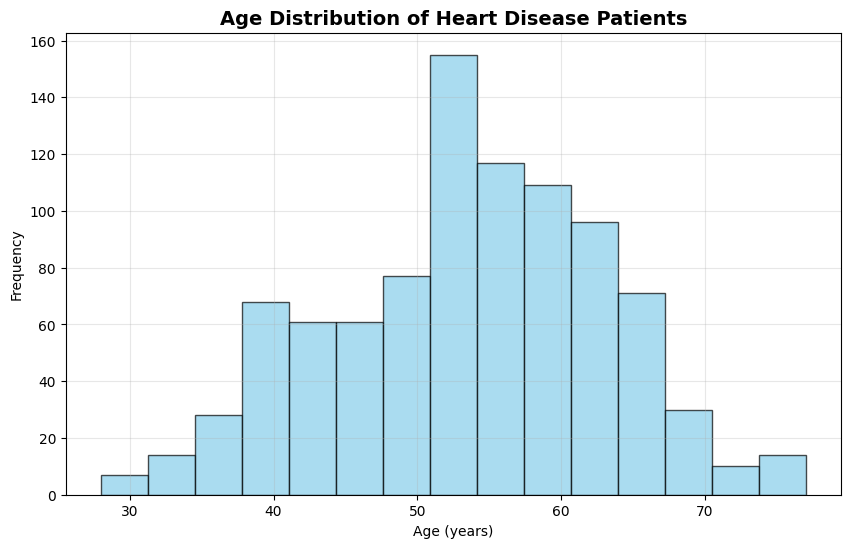

In [7]:
print("=== PART 2: DESCRIPTIVE STATISTICS AND BIVARIATE ANALYSIS ===")

# SECTION 1: FREQUENCY DISTRIBUTION AND SUMMARY MEASURES
print("\n=== FREQUENCY DISTRIBUTION FOR AGE ===")

# Creating age bins for frequency distribution
age_bins = [25, 35, 45, 55, 65, 75, 80]
age_labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Frequency distribution table
age_freq = df['AgeGroup'].value_counts().sort_index()
age_freq_pct = (age_freq / len(df) * 100).round(1)
age_cumulative = age_freq.cumsum()
age_cumulative_pct = (age_cumulative / len(df) * 100).round(1)

freq_table = pd.DataFrame({
    'Frequency': age_freq,
    'Relative Frequency (%)': age_freq_pct,
    'Cumulative Frequency': age_cumulative,
    'Cumulative Percentage (%)': age_cumulative_pct
})

print("Age Frequency Distribution:")
print(freq_table)

# Summary measures for Age
print(f"\n=== SUMMARY MEASURES FOR AGE ===")
print(f"Mean: {df['Age'].mean():.2f} years")
print(f"Median: {df['Age'].median():.2f} years")
print(f"Mode: {df['Age'].mode().iloc[0]:.0f} years")
print(f"Range: {df['Age'].max() - df['Age'].min():.0f} years ({df['Age'].min()}-{df['Age'].max()})")
print(f"Variance: {df['Age'].var():.2f}")
print(f"Standard Deviation: {df['Age'].std():.2f} years")
print(f"25th Percentile: {df['Age'].quantile(0.25):.0f} years")
print(f"75th Percentile: {df['Age'].quantile(0.75):.0f} years")

# Createing histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Heart Disease Patients', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


=== BIVARIATE ANALYSIS ===

--- Association between Sex and Heart Disease (Qualitative Variables) ---
Cross-tabulation table:
HeartDisease    0    1  All
Sex                        
F             143   50  193
M             267  458  725
All           410  508  918

Chi-square test results:
Chi-square statistic: 84.145
p-value: 0.000000
Degrees of freedom: 1
Critical value (α=0.05): 3.841
Result: Statistically significant association (p < 0.05)

--- Correlation between Age and Maximum Heart Rate (Quantitative Variables) ---
Pearson correlation coefficient: -0.3820
Coefficient of determination (r²): 0.1460
p-value for correlation: 0.0000000000
Result: Statistically significant correlation (p < 0.05)


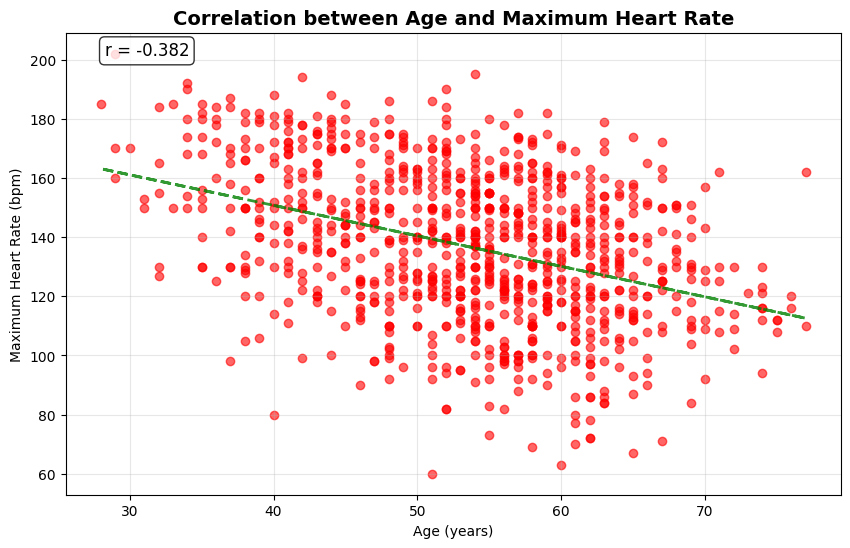


=== END OF PART 2 ANALYSIS ===


In [8]:
print(f"\n=== BIVARIATE ANALYSIS ===")

# SECTION 2A: QUALITATIVE ASSOCIATION - Sex vs Heart Disease
print("\n--- Association between Sex and Heart Disease (Qualitative Variables) ---")

# Cross-tabulation
crosstab = pd.crosstab(df['Sex'], df['HeartDisease'], margins=True)
print("Cross-tabulation table:")
print(crosstab)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(df['Sex'], df['HeartDisease']))
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Critical value (α=0.05): {stats.chi2.ppf(0.95, dof):.3f}")

# Interpretation
if p_value < 0.05:
    print("Result: Statistically significant association (p < 0.05)")
else:
    print("Result: No statistically significant association (p ≥ 0.05)")

# SECTION 2B: QUANTITATIVE CORRELATION - Age vs MaxHR
print(f"\n--- Correlation between Age and Maximum Heart Rate (Quantitative Variables) ---")

# Correlation calculation
correlation = df['Age'].corr(df['MaxHR'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"Coefficient of determination (r²): {correlation**2:.4f}")

# Statistical significance test
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(df['Age'], df['MaxHR'])
print(f"p-value for correlation: {p_val:.10f}")

if p_val < 0.05:
    print("Result: Statistically significant correlation (p < 0.05)")
else:
    print("Result: No statistically significant correlation (p ≥ 0.05)")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['MaxHR'], alpha=0.6, color='red')
plt.title('Correlation between Age and Maximum Heart Rate', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Maximum Heart Rate (bpm)')

# Trend line
z = np.polyfit(df['Age'], df['MaxHR'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "g--", alpha=0.8, linewidth=2)
plt.text(0.05, 0.95, f'r = {correlation:.3f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== END OF PART 2 ANALYSIS ===")

In [12]:
print("=== PART 3: PROBABILITY AND DISTRIBUTIONS ===")

print("\n=== PROBABILITY CALCULATIONS FROM DATASET ===")

# Basic probabilities from our dataset
total_patients = len(df)
print(f"Total patients in dataset: {total_patients}")

# Basic probabilities
prob_heart_disease = df['HeartDisease'].sum() / total_patients
prob_male = (df['Sex'] == 'M').sum() / total_patients
prob_female = (df['Sex'] == 'F').sum() / total_patients

print(f"\nBasic Probabilities:")
print(f"P(Heart Disease) = {prob_heart_disease:.4f} or {prob_heart_disease*100:.1f}%")
print(f"P(Male) = {prob_male:.4f} or {prob_male*100:.1f}%")
print(f"P(Female) = {prob_female:.4f} or {prob_female*100:.1f}%")

# Conditional probabilities
males_with_hd = df[(df['Sex'] == 'M') & (df['HeartDisease'] == 1)].shape[0]
total_males = (df['Sex'] == 'M').sum()
prob_hd_given_male = males_with_hd / total_males

females_with_hd = df[(df['Sex'] == 'F') & (df['HeartDisease'] == 1)].shape[0]
total_females = (df['Sex'] == 'F').sum()
prob_hd_given_female = females_with_hd / total_females

print(f"\nConditional Probabilities:")
print(f"P(Heart Disease | Male) = {prob_hd_given_male:.4f} or {prob_hd_given_male*100:.1f}%")
print(f"P(Heart Disease | Female) = {prob_hd_given_female:.4f} or {prob_hd_given_female*100:.1f}%")


=== PART 3: PROBABILITY AND DISTRIBUTIONS ===

=== PROBABILITY CALCULATIONS FROM DATASET ===
Total patients in dataset: 918

Basic Probabilities:
P(Heart Disease) = 0.5534 or 55.3%
P(Male) = 0.7898 or 79.0%
P(Female) = 0.2102 or 21.0%

Conditional Probabilities:
P(Heart Disease | Male) = 0.6317 or 63.2%
P(Heart Disease | Female) = 0.2591 or 25.9%


In [10]:

# Bayes' Theorem Example
print(f"\n=== BAYES' THEOREM CALCULATION ===")
print(f"Medical Diagnostic Scenario:")
print(f"Given a positive heart disease diagnosis, what's the probability the patient is male?")

# P(Male | Heart Disease) using Bayes' theorem
# P(Male | HD) = P(HD | Male) * P(Male) / P(HD)

prob_male_given_hd = (prob_hd_given_male * prob_male) / prob_heart_disease

print(f"\nUsing Bayes' Theorem:")
print(f"P(Male | Heart Disease) = P(HD | Male) × P(Male) / P(HD)")
print(f"P(Male | Heart Disease) = {prob_hd_given_male:.4f} × {prob_male:.4f} / {prob_heart_disease:.4f}")
print(f"P(Male | Heart Disease) = {prob_male_given_hd:.4f} or {prob_male_given_hd*100:.1f}%")

# Verification using direct counting
males_among_hd_patients = males_with_hd / df['HeartDisease'].sum()
print(f"\nVerification (direct counting): {males_among_hd_patients:.4f} or {males_among_hd_patients*100:.1f}%")

# Exercise Angina Example
print(f"\n=== ANOTHER PROBABILITY EXAMPLE ===")
exercise_angina_yes = (df['ExerciseAngina'] == 'Y').sum()
prob_exercise_angina = exercise_angina_yes / total_patients

# Joint probability
both_male_and_angina = df[(df['Sex'] == 'M') & (df['ExerciseAngina'] == 'Y')].shape[0]
prob_male_and_angina = both_male_and_angina / total_patients

print(f"P(Exercise Angina) = {prob_exercise_angina:.4f} or {prob_exercise_angina*100:.1f}%")
print(f"P(Male AND Exercise Angina) = {prob_male_and_angina:.4f} or {prob_male_and_angina*100:.1f}%")

# Check for independence
expected_if_independent = prob_male * prob_exercise_angina
print(f"\nIf Sex and Exercise Angina were independent:")
print(f"Expected P(Male AND Exercise Angina) = {expected_if_independent:.4f}")
print(f"Actual P(Male AND Exercise Angina) = {prob_male_and_angina:.4f}")

if abs(prob_male_and_angina - expected_if_independent) < 0.01:
    print("Variables appear to be approximately independent")
else:
    print("Variables are NOT independent")




=== BAYES' THEOREM CALCULATION ===
Medical Diagnostic Scenario:
Given a positive heart disease diagnosis, what's the probability the patient is male?

Using Bayes' Theorem:
P(Male | Heart Disease) = P(HD | Male) × P(Male) / P(HD)
P(Male | Heart Disease) = 0.6317 × 0.7898 / 0.5534
P(Male | Heart Disease) = 0.9016 or 90.2%

Verification (direct counting): 0.9016 or 90.2%

=== ANOTHER PROBABILITY EXAMPLE ===
P(Exercise Angina) = 0.4041 or 40.4%
P(Male AND Exercise Angina) = 0.3573 or 35.7%

If Sex and Exercise Angina were independent:
Expected P(Male AND Exercise Angina) = 0.3192
Actual P(Male AND Exercise Angina) = 0.3573
Variables are NOT independent


In [11]:
print(f"\n=== RANDOM VARIABLES AND DISTRIBUTIONS ===")

# Discrete Random Variable Example - Number of Risk Factors
print(f"\nDiscrete Random Variable Example:")
print(f"Counting cardiac risk factors per patient...")

# Risk factor count (simplified example)
# Risk factors: Age>55, Male, Exercise Angina, High Cholesterol (>240), High BP (>140)
df['RiskFactors'] = 0
df['RiskFactors'] += (df['Age'] > 55).astype(int)
df['RiskFactors'] += (df['Sex'] == 'M').astype(int)
df['RiskFactors'] += (df['ExerciseAngina'] == 'Y').astype(int)
df['RiskFactors'] += (df['Cholesterol'] > 240).astype(int)
df['RiskFactors'] += (df['RestingBP'] > 140).astype(int)

risk_dist = df['RiskFactors'].value_counts().sort_index()
print(f"\nRisk Factor Distribution (Discrete Random Variable):")
for factors, count in risk_dist.items():
    prob = count / total_patients
    print(f"P(X = {factors} risk factors) = {prob:.4f} ({count} patients)")

print(f"\nMean number of risk factors: {df['RiskFactors'].mean():.2f}")
print(f"Variance: {df['RiskFactors'].var():.2f}")

# Continuous Random Variable Example
print(f"\nContinuous Random Variable Example:")
print(f"Maximum Heart Rate follows approximately normal distribution")

mean_hr = df['MaxHR'].mean()
std_hr = df['MaxHR'].std()
print(f"MaxHR ~ Normal(μ={mean_hr:.1f}, σ={std_hr:.1f})")

# Probabilities for normal distribution
prob_hr_below_130 = stats.norm.cdf(130, mean_hr, std_hr)
prob_hr_above_160 = 1 - stats.norm.cdf(160, mean_hr, std_hr)
prob_hr_between_120_150 = stats.norm.cdf(150, mean_hr, std_hr) - stats.norm.cdf(120, mean_hr, std_hr)

print(f"\nProbabilities using normal distribution:")
print(f"P(MaxHR < 130) = {prob_hr_below_130:.4f} or {prob_hr_below_130*100:.1f}%")
print(f"P(MaxHR > 160) = {prob_hr_above_160:.4f} or {prob_hr_above_160*100:.1f}%")
print(f"P(120 < MaxHR < 150) = {prob_hr_between_120_150:.4f} or {prob_hr_between_120_150*100:.1f}%")

print(f"\n=== END OF PART 3 ANALYSIS ===")


=== RANDOM VARIABLES AND DISTRIBUTIONS ===

Discrete Random Variable Example:
Counting cardiac risk factors per patient...

Risk Factor Distribution (Discrete Random Variable):
P(X = 0 risk factors) = 0.0534 (49 patients)
P(X = 1 risk factors) = 0.2288 (210 patients)
P(X = 2 risk factors) = 0.3039 (279 patients)
P(X = 3 risk factors) = 0.2636 (242 patients)
P(X = 4 risk factors) = 0.1166 (107 patients)
P(X = 5 risk factors) = 0.0338 (31 patients)

Mean number of risk factors: 2.26
Variance: 1.41

Continuous Random Variable Example:
Maximum Heart Rate follows approximately normal distribution
MaxHR ~ Normal(μ=136.8, σ=25.5)

Probabilities using normal distribution:
P(MaxHR < 130) = 0.3946 or 39.5%
P(MaxHR > 160) = 0.1812 or 18.1%
P(120 < MaxHR < 150) = 0.4432 or 44.3%

=== END OF PART 3 ANALYSIS ===


In [14]:
print("=== PART 4: SAMPLING TECHNIQUES ===")

total_population = len(df)
print(f"Total population size: {total_population}")

print(f"\n=== SAMPLING METHODS DEMONSTRATION ===")

# Demonstrate different sampling methods
print(f"\n1. SIMPLE RANDOM SAMPLING:")
simple_random_sample = df.sample(n=100, random_state=42)
print(f"Selected {len(simple_random_sample)} patients randomly")
print(f"Sample mean age: {simple_random_sample['Age'].mean():.1f} years")
print(f"Population mean age: {df['Age'].mean():.1f} years")

print(f"\n2. STRATIFIED SAMPLING BY SEX:")
# Proportional stratified sampling
male_prop = (df['Sex'] == 'M').mean()
female_prop = (df['Sex'] == 'F').mean()

sample_size = 100
male_sample_size = int(sample_size * male_prop)
female_sample_size = sample_size - male_sample_size

male_sample = df[df['Sex'] == 'M'].sample(n=male_sample_size, random_state=42)
female_sample = df[df['Sex'] == 'F'].sample(n=female_sample_size, random_state=42)
stratified_sample = pd.concat([male_sample, female_sample])

print(f"Population: {male_prop:.1%} male, {female_prop:.1%} female")
print(f"Stratified sample: {male_sample_size} males, {female_sample_size} females")
print(f"Sample proportions: {male_sample_size/sample_size:.1%} male, {female_sample_size/sample_size:.1%} female")

print(f"\n3. SYSTEMATIC SAMPLING:")
k = total_population // 100  # Every kth element
systematic_indices = list(range(0, total_population, k))[:100]
systematic_sample = df.iloc[systematic_indices]
print(f"Selected every {k}th patient")
print(f"Sample size: {len(systematic_sample)}")


=== PART 4: SAMPLING TECHNIQUES ===
Total population size: 918

=== SAMPLING METHODS DEMONSTRATION ===

1. SIMPLE RANDOM SAMPLING:
Selected 100 patients randomly
Sample mean age: 53.5 years
Population mean age: 53.5 years

2. STRATIFIED SAMPLING BY SEX:
Population: 79.0% male, 21.0% female
Stratified sample: 78 males, 22 females
Sample proportions: 78.0% male, 22.0% female

3. SYSTEMATIC SAMPLING:
Selected every 9th patient
Sample size: 100


In [15]:
print(f"\n=== SAMPLE SIZE CALCULATION ===")

# Sample size calculation for estimating mean age
confidence_level = 0.95
alpha = 1 - confidence_level
z_alpha_2 = 1.96  # Z-score for 95% confidence

# For estimating population mean
margin_of_error_years = 1.0  # ±1 year
population_std = df['Age'].std()

print(f"\nScenario: Estimating mean patient age")
print(f"Confidence level: {confidence_level*100}%")
print(f"Desired margin of error: ±{margin_of_error_years} years")
print(f"Population standard deviation: {population_std:.2f} years")

# Sample size formula: n = (Z²α/2 × σ²) / E²
n_mean = (z_alpha_2**2 * population_std**2) / (margin_of_error_years**2)
print(f"\nRequired sample size: n = (1.96² × {population_std:.2f}²) / {margin_of_error_years}²")
print(f"Required sample size: n = {n_mean:.0f} patients")

# Sample size calculation for estimating proportion
print(f"\n=== SAMPLE SIZE FOR PROPORTION ===")
print(f"Scenario: Estimating proportion of patients with heart disease")

# Use observed proportion
observed_prop = df['HeartDisease'].mean()
margin_of_error_prop = 0.05  # ±5%

# Sample size formula: n = (Z²α/2 × p × (1-p)) / E²
n_prop = (z_alpha_2**2 * observed_prop * (1 - observed_prop)) / (margin_of_error_prop**2)

print(f"Observed proportion: {observed_prop:.3f} ({observed_prop*100:.1f}%)")
print(f"Desired margin of error: ±{margin_of_error_prop*100}%")
print(f"Required sample size: n = (1.96² × {observed_prop:.3f} × {1-observed_prop:.3f}) / {margin_of_error_prop}²")
print(f"Required sample size: n = {n_prop:.0f} patients")

# Conservative approach (p = 0.5 for maximum sample size)
n_prop_conservative = (z_alpha_2**2 * 0.5 * 0.5) / (margin_of_error_prop**2)
print(f"\nConservative approach (p = 0.5): n = {n_prop_conservative:.0f} patients")



=== SAMPLE SIZE CALCULATION ===

Scenario: Estimating mean patient age
Confidence level: 95.0%
Desired margin of error: ±1.0 years
Population standard deviation: 9.43 years

Required sample size: n = (1.96² × 9.43²) / 1.0²
Required sample size: n = 342 patients

=== SAMPLE SIZE FOR PROPORTION ===
Scenario: Estimating proportion of patients with heart disease
Observed proportion: 0.553 (55.3%)
Desired margin of error: ±5.0%
Required sample size: n = (1.96² × 0.553 × 0.447) / 0.05²
Required sample size: n = 380 patients

Conservative approach (p = 0.5): n = 384 patients


In [16]:
print(f"\n=== REAL-WORLD SAMPLING STUDY EXAMPLE ===")
print(f"Hypothetical Multi-Center Cardiovascular Study")

# Simulate a multi-center study design
centers = ['Hospital A', 'Hospital B', 'Hospital C', 'Hospital D']
center_populations = [2500, 1800, 3200, 2100]
total_target_population = sum(center_populations)

print(f"\nTarget Population:")
for i, (center, pop) in enumerate(zip(centers, center_populations)):
    print(f"{center}: {pop} eligible patients ({pop/total_target_population*100:.1f}%)")
print(f"Total target population: {total_target_population} patients")

# Determine sample size needed
desired_precision = 0.03  # ±3% for heart disease prevalence
expected_prevalence = 0.55  # Based on our da taset

n_study = (z_alpha_2**2 * expected_prevalence * (1 - expected_prevalence)) / (desired_precision**2)
print(f"\nStudy objectives:")
print(f"Estimate heart disease prevalence with ±{desired_precision*100}% precision")
print(f"Expected prevalence: {expected_prevalence*100}%")
print(f"Required total sample size: {n_study:.0f} patients")

# Proportional allocation across centers
print(f"\nProportional allocation across centers:")
for center, pop in zip(centers, center_populations):
    allocation = int(n_study * (pop / total_target_population))
    print(f"{center}: {allocation} patients ({allocation/n_study*100:.1f}% of sample)")

print(f"\n=== SAMPLING METHOD COMPARISON ===")
print(f"Comparing different sampling approaches for our study:")

print(f"\nRandom Sampling:")
print(f"  Advantages: Unbiased, mathematically valid")
print(f"  Disadvantages: May not represent all subgroups")

print(f"\nStratified Sampling (by Sex/Age Groups):")
print(f"  Advantages: Ensures representation of key subgroups")
print(f"  Disadvantages: Requires knowledge of population strata")

print(f"\nCluster Sampling (by Hospital):")
print(f"  Advantages: Practical for multi-center studies")
print(f"  Disadvantages: May introduce clustering effects")

print(f"\n=== END OF PART 4 ANALYSIS ===")


=== REAL-WORLD SAMPLING STUDY EXAMPLE ===
Hypothetical Multi-Center Cardiovascular Study

Target Population:
Hospital A: 2500 eligible patients (26.0%)
Hospital B: 1800 eligible patients (18.8%)
Hospital C: 3200 eligible patients (33.3%)
Hospital D: 2100 eligible patients (21.9%)
Total target population: 9600 patients

Study objectives:
Estimate heart disease prevalence with ±3.0% precision
Expected prevalence: 55.00000000000001%
Required total sample size: 1056 patients

Proportional allocation across centers:
Hospital A: 275 patients (26.0% of sample)
Hospital B: 198 patients (18.7% of sample)
Hospital C: 352 patients (33.3% of sample)
Hospital D: 231 patients (21.9% of sample)

=== SAMPLING METHOD COMPARISON ===
Comparing different sampling approaches for our study:

Random Sampling:
  Advantages: Unbiased, mathematically valid
  Disadvantages: May not represent all subgroups

Stratified Sampling (by Sex/Age Groups):
  Advantages: Ensures representation of key subgroups
  Disadvant